In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# setting no limit for the max columns to display, for easier investigation 
pd.options.display.max_columns = None

df = pd.read_csv('Complete_Dataset_updated.csv')
df.head()

,Date,DOY,Sample,Sub-Sample,Lat,Long_,Sample_type,Animals,DM,MM,Biomass,NDF,ADF,CP,TDN_based_ADF,TDN_based_NDF,Satellite_Images_Dates,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,NDVI,NDWI,EVI,LAI,DVI,GCI,GEMI,SAVI,TEMP_MAX,TEMP_MIN,RAD_SOL,Rainfall,WIND_SPD,EVAPOT,PRES_ATM,HUM_REL,TP_SFC_AVG,Wind_Dir,Dew_Point,Radiative_Dif_AVG,Radiative_Direct_AVG,PPFD,Longwave_Rad_AVG,Environmental Suitability Index
0,7/6/2022,187,1,1,-20.446717,-54.839505,Q1,1,54.177195,6.869019,2943.000000,79.722130,52.504546,4.632363,47.998959,50.537899,44744,1325,1456,1710,2012,2427,2952,3147,3171,3272,3280,3499,2919,0.223616,-0.033525,0.160974,0.464404,1159,0.854386,-1341990.624,0.335391,30.7,19.2,16.17,0.0,21.8,4.95,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,3.209516
1,7/6/2022,187,1,2,-20.446717,-54.839505,Q1,1,54.177058,6.835684,2943.000000,70.663844,46.794328,4.811976,52.447219,54.316111,44744,1325,1456,1710,2012,2427,2952,3147,3171,3272,3280,3499,2919,0.223616,-0.033525,0.160974,0.464404,1159,0.854386,-1341990.624,0.335391,30.7,19.2,16.17,0.0,21.8,4.95,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,5.109516
2,7/6/2022,187,2,1,-20.446996,-54.838856,Q4,1,52.260843,5.125652,2855.333333,79.330072,50.323829,4.644871,49.697737,50.701427,44744,1358,1449,1703,2019,2435,2956,3096,3146,3303,3260,3415,2855,0.218199,-0.016672,0.156601,0.448582,1127,0.847328,-1268877.255,0.327267,30.7,19.2,16.17,0.0,21.8,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,3.506646
3,7/6/2022,187,2,2,-20.446996,-54.838856,Q4,1,52.285797,5.241126,2855.333333,73.021953,49.138437,4.647189,50.621158,53.332543,44744,1358,1449,1703,2019,2435,2956,3096,3146,3303,3260,3415,2855,0.218199,-0.016672,0.156601,0.448582,1127,0.847328,-1268877.255,0.327267,30.7,19.2,16.17,0.0,21.8,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,4.606646
4,7/6/2022,187,3,1,-20.446424,-54.839246,G2,1,49.984466,4.742429,3058.666667,74.705529,53.632386,5.006476,47.120371,52.630324,44744,1318,1422,1664,1986,2381,2861,3025,3060,3156,3194,3323,2834,0.212842,-0.025776,0.150619,0.426941,1074,0.838942,-1152285.914,0.319231,30.7,19.2,16.17,0.0,21.8,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,3.703806


In [4]:
df.isna().sum().sum()

0

In [5]:
df.describe()

,DOY,Sample,Sub-Sample,Lat,Long_,Animals,DM,MM,Biomass,NDF,ADF,CP,TDN_based_ADF,TDN_based_NDF,Satellite_Images_Dates,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,NDVI,NDWI,EVI,LAI,DVI,GCI,GEMI,SAVI,TEMP_MAX,TEMP_MIN,RAD_SOL,Rainfall,WIND_SPD,EVAPOT,PRES_ATM,HUM_REL,TP_SFC_AVG,Wind_Dir,Dew_Point,Radiative_Dif_AVG,Radiative_Direct_AVG,PPFD,Longwave_Rad_AVG,Environmental Suitability Index
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,3.120000e+02,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,188.743590,78.500000,1.500000,-20.446665,-54.839072,0.730769,38.154921,7.534171,4302.398077,70.544933,45.302901,6.086798,53.609040,54.365708,44807.974359,1578.807692,1627.205128,1921.160256,1972.060897,2559.737179,3521.496795,3771.769231,3666.554487,3874.108974,4018.910256,3305.644231,2574.814103,0.299255,0.078241,0.231251,0.718667,1694.493590,0.933055,-3.258668e+06,0.448843,31.096795,20.689744,21.283462,1.291026,14.955769,5.152468,1012.706490,58.668803,20.774560,163.932956,12.027967,115.190917,185.126625,496.995825,378.559889,4.612894
std,105.721643,45.104737,0.500803,0.000313,0.000352,0.444273,11.608339,1.677463,3279.988726,9.080515,6.868590,2.765603,5.350632,3.787483,101.185446,374.406783,334.511175,279.672351,350.805751,316.273481,451.141539,506.116033,491.081309,524.838828,777.835312,425.805881,414.754579,0.105571,0.071313,0.087852,0.317849,624.974428,0.306413,2.095293e+06,0.158342,1.990796,2.565168,4.661218,3.564461,3.792703,1.065177,3.888528,12.934797,4.838513,36.959370,5.128337,81.528872,148.668256,190.600428,33.865848,1.205327
min,13.000000,1.000000,1.000000,-20.447259,-54.839922,0.000000,16.935654,3.093765,305.866667,35.664297,28.792612,1.690487,39.719780,47.487004,44654.000000,1246.000000,1278.000000,1440.000000,1385.000000,1617.000000,2025.000000,2079.000000,2097.000000,2064.000000,2181.000000,1729.000000,1377.000000,-0.003776,-0.046005,-0.002823,-0.128212,-23.000000,0.239061,-8.164595e+06,-0.005664,26.600000,14.600000,10.940000,0.000000,7.000000,2.540000,1002.633333,30.291667,10.996312,85.666762,2.217361,31.683868,0.254224,216.264717,280.206757,2.778706
25%,110.000000,39.750000,1.000000,-20.446942,-54.839305,0.000000,29.645366,6.315512,2026.333333,67.415232,39.877611,4.337849,49.955486,51.969429,44709.000000,1325.750000,1396.000000,1735.000000,1671.750000,2364.750000,3214.250000,3408.000000,3366.000000,3555.000000,3602.000000,2993.750000,2176.750000,0.212842,0.010116,0.153675,0.437998,1158.000000,0.795225,-4.679255e+06,0.319231,30.400000,18.300000,17.630000,0.000000,12.400000,4.550000,1011.633333,48.958333,17.341752,140.683897,8.584028,69.671801,11.770339,358.950201,344.212487,3.806267
50%,187.000000,78.500000,1.500000,-20.446656,-54.839092,1.000000,35.102975,7.475458,3189.833333,71.374013,44.758033,5.577429,54.033493,54.019899,44804.000000,1423.000000,1558.000000,1833.000000,1991.000000,2546.500000,3579.500000,3851.500000,3720.500000,3947.000000,4001.000000,3360.000000,2683.500000,0.303419,0.075639,0.239205,0.747444,1781.500000,0.937597,-3.171682e+06,0.455091,31.300000,21.200000,21.685000,0.000000,14.500000,4.960000,1014.016667,58.229167,20.950129,166.170833,12.442361,90.788150,222.349822,522.804713,391.709644,4.451956
75%,286.000000,117.250000,2.000000,-20.446412,-54.838811,1.000000,48.707920,8.711135,5237.250000,76.290029,49.992958,7.385197,57.835341,55.671107,44894.000000,1621.750000,1648.000000,2005.000000,2190.000000,2734.000000,3827.500000,4172.250000,4020.500000,4255.000000,4245.250000,3572.000000,2878.000000,0.382373,0.135778,0.295375,0.950667,2163.750000,1.141230,-1

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

# the dates are in Excel date format, so we need to turn into datetime objects
df['Satellite_Images_Dates'] = pd.to_datetime(df['Satellite_Images_Dates'], origin='1899-12-30', unit='D')

df['Satellite_Images_Dates'] = df['Satellite_Images_Dates'].dt.strftime('%Y-%m-%d')
df[['Date', 'Satellite_Images_Dates']]

,Date,Satellite_Images_Dates
0,2022-07-06,2022-07-02
1,2022-07-06,2022-07-02
2,2022-07-06,2022-07-02
3,2022-07-06,2022-07-02
4,2022-07-06,2022-07-02
...,...,...
307,2023-03-01,2023-02-27
308,2023-03-01,2023-02-27
309,2023-03-01,2023-02-27
310,2023-03-01,2023-02-27


# Descriptive Statistics

### Measures of Frequency

In [7]:
df['Sample_type'].value_counts()

Sample_type
Q1    42
Q4    42
Q3    42
S1    42
S2    42
Q2    40
G1    20
G2    18
G3    12
G4    12
Name: count, dtype: int64

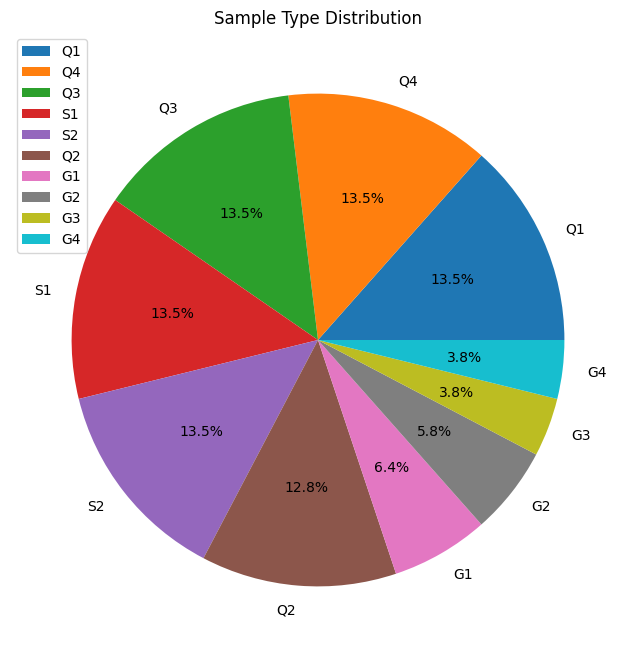

In [8]:
plt.figure(figsize=(15, 8))
plt.pie(df['Sample_type'].value_counts(), labels=df['Sample_type'].value_counts().index, autopct='%1.1f%%', wedgeprops=dict(width=1))
plt.title('Sample Type Distribution')
plt.legend()
plt.show()

In [9]:
# commulative sum of the rainfall values
df['Rainfall'].value_counts().cumsum()

Rainfall
0.0     174
0.4     212
2.0     232
0.6     248
0.8     264
18.4    276
3.3     288
2.9     300
2.5     312
Name: count, dtype: int64

In [10]:
df['DOY'].nunique()

21

In [11]:
# relative frequency of DOY
relative_freq_doy = df['DOY'].value_counts() / len(df)
relative_freq_doy

DOY
125    0.064103
96     0.064103
307    0.064103
286    0.057692
342    0.057692
215    0.057692
187    0.051282
153    0.051282
40     0.051282
13     0.051282
251    0.044872
202    0.038462
236    0.038462
320    0.038462
333    0.038462
110    0.038462
348    0.038462
173    0.038462
26     0.038462
138    0.038462
60     0.038462
Name: count, dtype: float64

In [12]:
grouped_date_rainfall = df.groupby('Date')['Rainfall'].sum().reset_index() # reset_index() to turn the groupby object into a DataFrame
grouped_date_rainfall.columns = ['Date', 'Total Rainfall']
grouped_date_rainfall

,Date,Total Rainfall
0,2022-04-06,40.0
1,2022-04-20,0.0
2,2022-05-05,0.0
3,2022-05-18,0.0
4,2022-06-02,0.0
5,2022-06-22,220.8
6,2022-07-06,0.0
7,2022-07-21,0.0
8,2022-08-03,0.0
9,2022-08-24,0.0


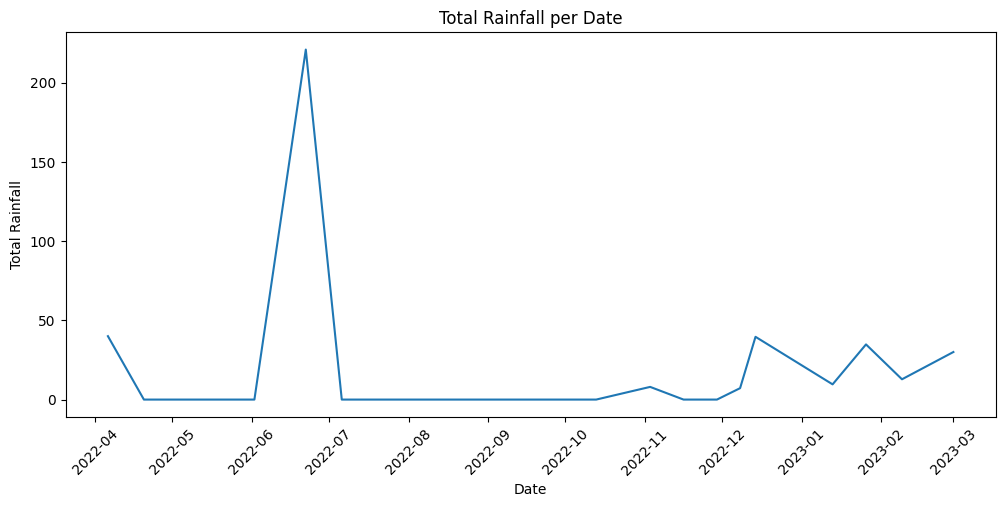

In [13]:
plt.figure(figsize=(12, 5))
plt.plot(grouped_date_rainfall['Date'], grouped_date_rainfall['Total Rainfall'])
plt.xlabel('Date')
plt.ylabel('Total Rainfall')
plt.title('Total Rainfall per Date')
plt.xticks(rotation=45)
plt.show()

The dates: 2022-12-14, 2023-01-1, 2023-01-26, 2023-02-09, 2023-03-0, and 2022-04-06	, showed the highest **consistant** rainfall, this suggests that during the months (12, 1, 2, 3, 4).
But surprisingly 2022-06-22 showed the highest rainfall in all of the collected data.

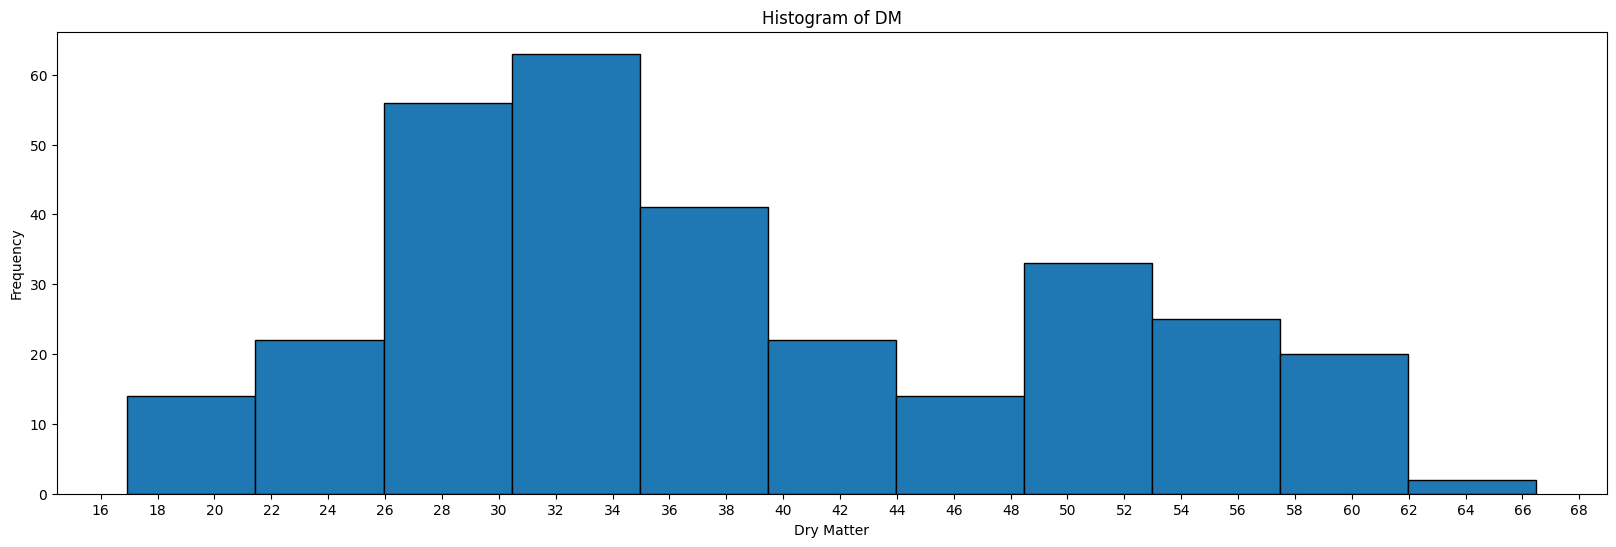

In [47]:
df['DM'].plot(kind='hist', bins=11, figsize=(20, 6),edgecolor= 'black')
plt.title('Histogram of DM')
plt.ylabel('Frequency')
plt.xlabel('Dry Matter')
plt.xticks(np.arange(16, 70, 2))
plt.show()

The most frequent Dry Matter Content (DMC) is 26%-35%, indicating that the forage provides a moderate balance of nutrients and moisture, suitable for livestock nutrition.

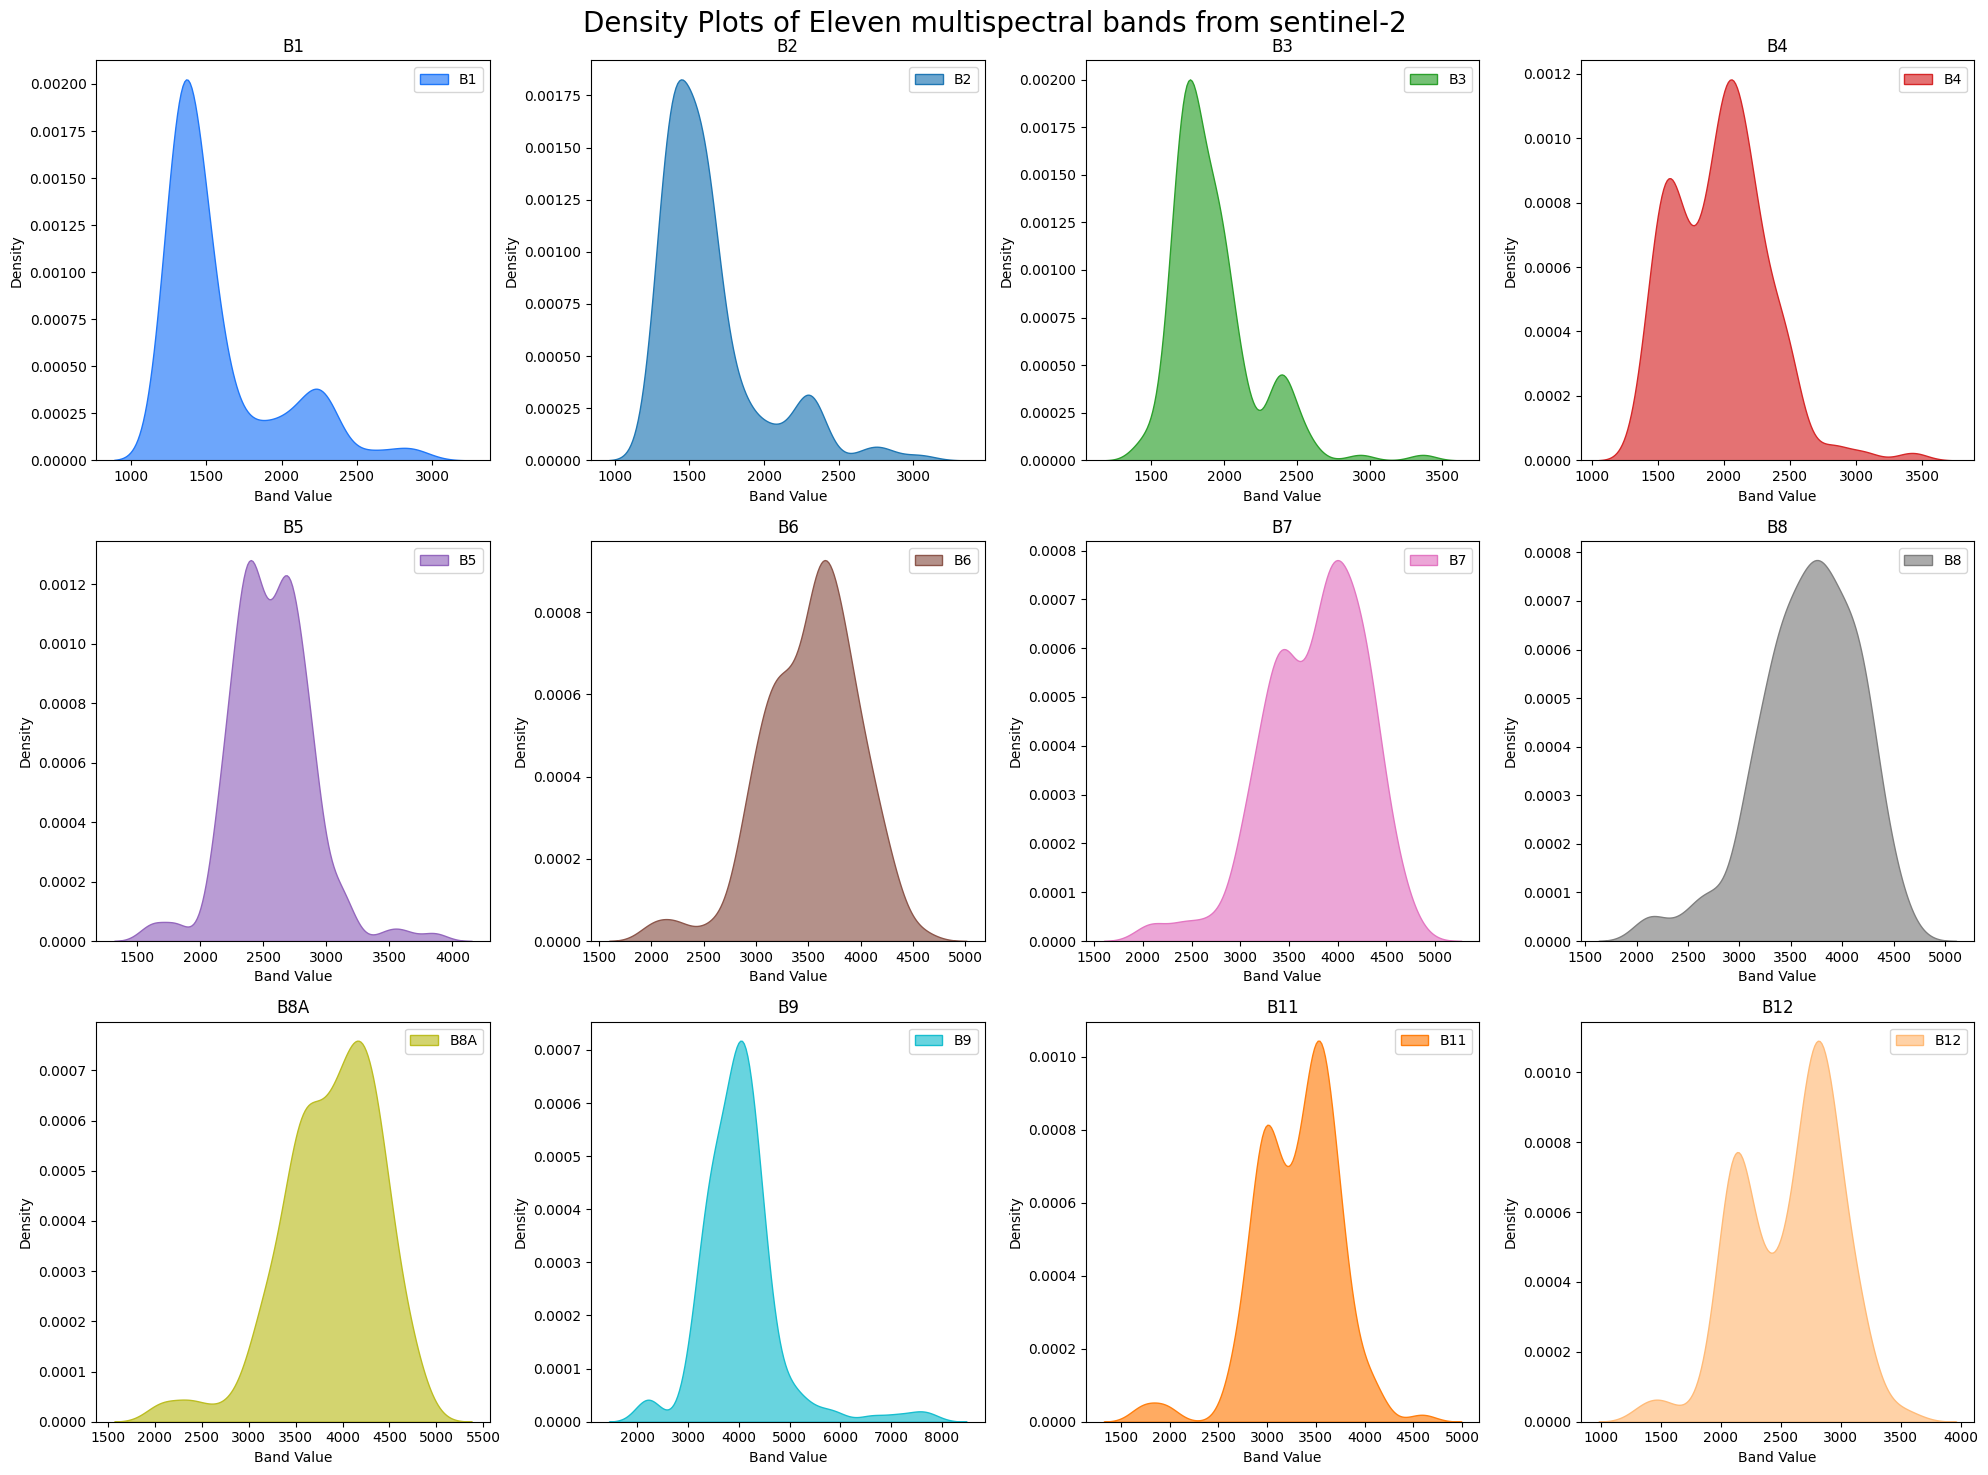

In [15]:
# analysis of Eleven multispectral bands from sentinel-2 
bands = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12']
# colors for each band
colors = {
    'B1': '#1f77f9',  # Coastal and Aerosol Band (Blue)
    'B2': '#1f77b4',  # Blue Band
    'B3': '#2ca02c',  # Green Band
    'B4': '#d62728',  # Red Band
    'B5': '#9467bd',  # Visible and Near Infrared (NIR) Band
    'B6': '#8c564b',  # Red Edge Band
    'B7': '#e377c2',  # Red Edge Band
    'B8': '#7f7f7f',  # NIR Band
    'B8A': '#bcbd22', # Narrow NIR Band
    'B9': '#17becf',  # Water Vapour Band
    'B11': '#ff7f0e', # Short Wave Infrared (SWIR) Band
    'B12': '#ffbb78'  # Short Wave Infrared (SWIR) Band
}
fig, axs = plt.subplots(3, 4, figsize=(20, 15))

for i, band in enumerate(bands):
    row = i // 4
    col = i % 4
    # axs[row, col].hist(df[band], bins=15, label=band, color=colors[band])
    # axs[row, col].set_xlabel('Band Frequency Value')
    # axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title(band)
    sns.kdeplot(df[band], label=band, color=colors[band], ax=axs[row, col], fill=True, alpha=0.65)
    axs[row, col].set_xlabel('Band Value')
    axs[row, col].set_ylabel('Density')
    axs[row, col].legend()

# fig.suptitle('Histograms of Eleven multispectral bands from sentinel-2', fontsize=20)
fig.suptitle('Density Plots of Eleven multispectral bands from sentinel-2', fontsize=20)
plt.tight_layout()
plt.show()

Distinct Peaks in Bands: Each band shows distinct density peaks, indicating specific ranges of reflectance values dominate in different spectral bands.

Wide Range of Values: Bands like B8 and B8A have broader peaks, suggesting higher variability in their reflectance values, potentially indicating vegetation or surface water.


In [16]:
df[(3500<df['B8']) & (df['B8']<4500)][['Lat', 'Long_']].value_counts()

Lat         Long_     
-20.446630  -54.839741    4
-20.447191  -54.838672    2
-20.446567  -54.839704    2
-20.446448  -54.838761    2
-20.446457  -54.839142    2
                         ..
-20.446941  -54.839110    2
-20.446971  -54.839104    2
-20.446972  -54.839168    2
-20.446020  -54.838856    2
-20.446846  -54.838447    1
Name: count, Length: 102, dtype: int64

the most frequent latitude and longitude values for the B8 band are (-20.446630, -54.839741), respectively. They showed 4 times, this might suggest that this area has a high reflectance for the range of frequency between 3500hz and 4500hz, for the B8 bandwidth.


### Measures of Central Tendency

In [17]:
df["Biomass"].value_counts()

Biomass
2943.000000     2
1510.000000     2
5532.000000     2
1520.333333     2
969.666667      2
               ..
4148.666667     2
4898.333333     2
12139.333330    2
305.866667      1
3058.666667     1
Name: count, Length: 157, dtype: int64

In [18]:
print(f'Sample_type mode: {df["Sample_type"].mode()[0]} -> {df["Sample_type"].value_counts().mode()[0]} times.')

Sample_type mode: Q1 -> 42 times.


In [19]:
print(f'Biomass mean: {df["Biomass"].mean()}')
print(f'Biomass median: {df["Biomass"].median()}')

Biomass mean: 4302.398076956089
Biomass median: 3189.8333334999998


### Measures of Dispersion

In [20]:
df.drop(['Date', 'Sample_type', 'Satellite_Images_Dates'], axis=1).var()

DOY                                1.117707e+04
Sample                             2.034437e+03
Sub-Sample                         2.508039e-01
Lat                                9.798142e-08
Long_                              1.240211e-07
Animals                            1.973782e-01
DM                                 1.347535e+02
MM                                 2.813881e+00
Biomass                            1.075833e+07
NDF                                8.245575e+01
ADF                                4.717753e+01
CP                                 7.648560e+00
TDN_based_ADF                      2.862926e+01
TDN_based_NDF                      1.434503e+01
B1                                 1.401804e+05
B2                                 1.118977e+05
B3                                 7.821662e+04
B4                                 1.230647e+05
B5                                 1.000289e+05
B6                                 2.035287e+05
B7                                 2.561

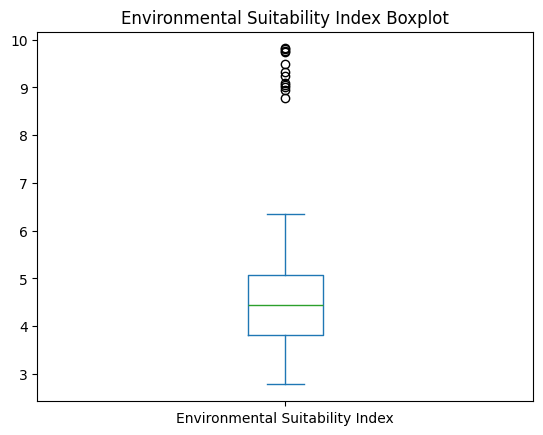

In [21]:
df['Environmental Suitability Index'].plot(kind='box', title='Environmental Suitability Index Boxplot')
plt.show()

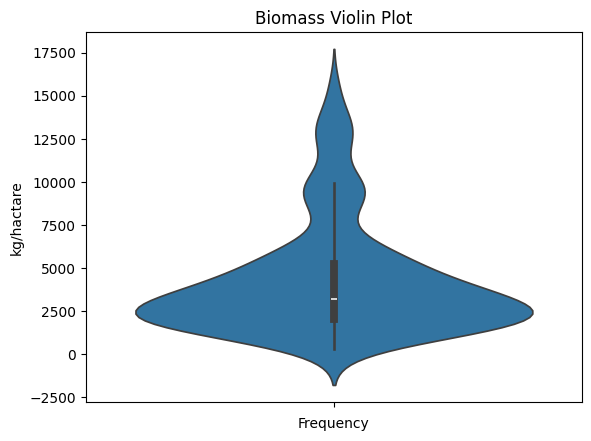

In [22]:
# df['Biomass'].plot(kind='violine', y='Biomass', title='Biomass Boxplot')
sns.violinplot(df['Biomass'])

plt.title('Biomass Violin Plot')
plt.xlabel('Frequency')
plt.ylabel('kg/hactare')
plt.show()

In [23]:
range_NDF = df["NDF"].max() - df["NDF"].min()
variance_NDF = df["NDF"].var()
std_dev_NDF = df["NDF"].std()

print("Range of NDF:", range_NDF)
print("Variance of NDF:", variance_NDF)
print("Standard Deviation of NDF:", std_dev_NDF)

Range of NDF: 51.372376159999995
Variance of NDF: 82.45574997320197
Standard Deviation of NDF: 9.080514851769253


In [24]:
# Interquartile Range (IQR):
columns = ['NDF', 'Biomass', 'DM', 'DOY', 'Rainfall', 'Environmental Suitability Index', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12']
iqr = lambda X: [float(df[x].quantile(0.75) - df[x].quantile(0.25)) for x in X.columns]
iqr_list = iqr(df[columns])
iqr_df = pd.DataFrame(iqr_list, index=columns, columns=['Interquartile Range (IQR)'])
iqr_df

,Interquartile Range (IQR)
NDF,8.874797
Biomass,3210.916667
DM,19.062555
DOY,176.000000
Rainfall,0.800000
Environmental Suitability Index,1.273124
B1,296.000000
B2,252.000000
B3,270.000000
B4,518.250000


In [25]:
# Coefficient of Variation (CV)
columns = ['NDF', 'Biomass', 'DM', 'DOY', 'Rainfall', 'Environmental Suitability Index', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12']
cv = lambda X: [float(np.std(df[x]) / np.mean(df[x]) * 100) for x in X.columns]
cv_list = cv(df[columns])
cv_df = pd.DataFrame(cv_list, index=columns, columns=['Coefficient of Variation (CV)'])
cv_df


,Coefficient of Variation (CV)
NDF,12.851314
Biomass,76.114020
DM,30.375430
DOY,55.923532
Rainfall,275.652510
Environmental Suitability Index,26.087617
B1,23.676493
B2,20.524436
B3,14.534123
B4,17.760258


### Measures of Position

In [26]:
# percentile
columns = ['NDF', 'Biomass', 'DM', 'DOY', 'Rainfall', 'Environmental Suitability Index', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12']
percent = lambda X: [list(np.percentile(df[x], [10, 30, 60, 80])) for x in X.columns]
percents_list = percent(df[columns])
percents_list = pd.DataFrame(percents_list, index=columns, columns=['10%', '30%', '60%', '80%'])
percents_list

,10%,30%,60%,80%
NDF,61.507812,68.605036,73.200568,77.471912
Biomass,1520.333333,2258.000000,3687.000000,5858.000000
DM,24.709747,30.572556,38.061541,50.029228
DOY,40.000000,125.000000,215.000000,307.000000
Rainfall,0.000000,0.000000,0.400000,2.000000
Environmental Suitability Index,3.443679,3.957627,4.696768,5.236166
B1,1300.100000,1350.000000,1462.000000,1845.000000
B2,1352.100000,1404.000000,1588.000000,1777.000000
B3,1673.600000,1755.000000,1920.000000,2053.200000
B4,1521.000000,1735.600000,2058.800000,2232.000000


In [27]:
# z-score
# 𝑍−𝑠𝑐𝑜𝑟𝑒 = (𝑥−µ)/σ

z_scores = df['ADF'].apply(lambda x: (x - df['ADF'].mean()) / df['ADF'].std())
z_scores_df = pd.DataFrame({'ADF': df['ADF'], 'z_score': z_scores})
z_scores_df

,ADF,z_score
0,52.504546,1.048490
1,46.794328,0.217137
2,50.323829,0.730998
3,49.138437,0.558417
4,53.632386,1.212692
...,...,...
307,40.637087,-0.679297
308,44.775544,-0.076778
309,45.194175,-0.015829
310,46.191561,0.129380


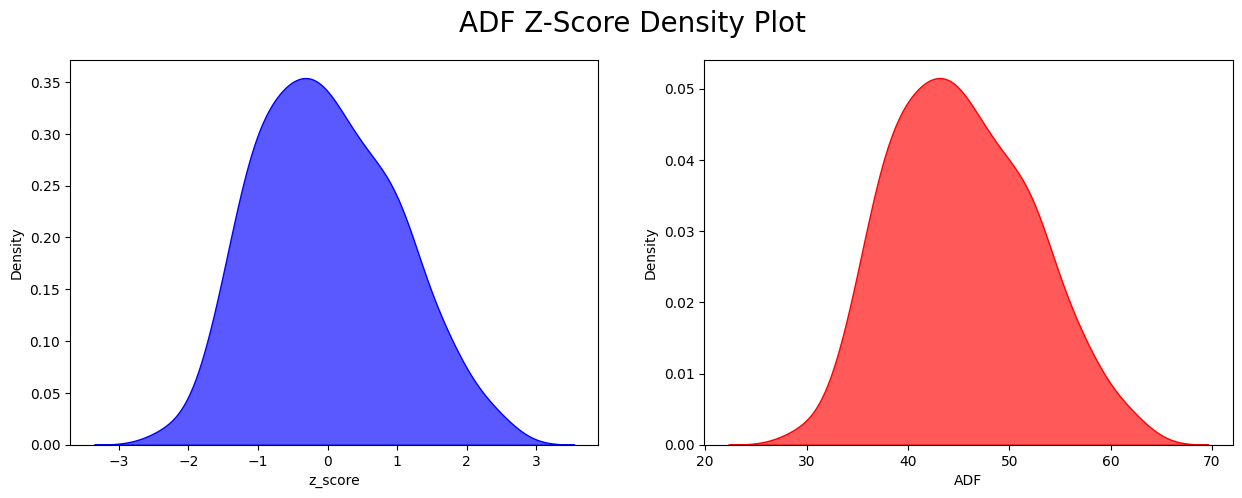

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.kdeplot(z_scores_df['z_score'], color='blue', fill=True, alpha=0.65, ax=ax[0])
sns.kdeplot(z_scores_df['ADF'], color='red', fill=True, alpha=0.65, ax=ax[1])
fig.suptitle('ADF Z-Score Density Plot', fontsize=20)
plt.show()

# sns.kdeplot(z_scores_df['z_score'], color='blue', fill=True, alpha=0.65)
# sns.kdeplot(z_scores_df['ADF'], color='red', fill=True, alpha=0.65)
# plt.show()

In [29]:
# quartile
columns = ['NDF', 'Biomass', 'DM', 'DOY', 'Rainfall', 'Environmental Suitability Index', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12']
quantiles = lambda X: [list(np.quantile(df[x], [0.25, 0.5, 0.75])) for x in X.columns]
quantiles_list = quantiles(df[columns])
quantiles_list = pd.DataFrame(quantiles_list, index=columns, columns=['Q1', 'Q2', 'Q3'])
quantiles_list

,Q1,Q2,Q3
NDF,67.415232,71.374013,76.290029
Biomass,2026.333333,3189.833333,5237.250000
DM,29.645366,35.102975,48.707920
DOY,110.000000,187.000000,286.000000
Rainfall,0.000000,0.000000,0.800000
Environmental Suitability Index,3.806267,4.451956,5.079392
B1,1325.750000,1423.000000,1621.750000
B2,1396.000000,1558.000000,1648.000000
B3,1735.000000,1833.000000,2005.000000
B4,1671.750000,1991.000000,2190.000000


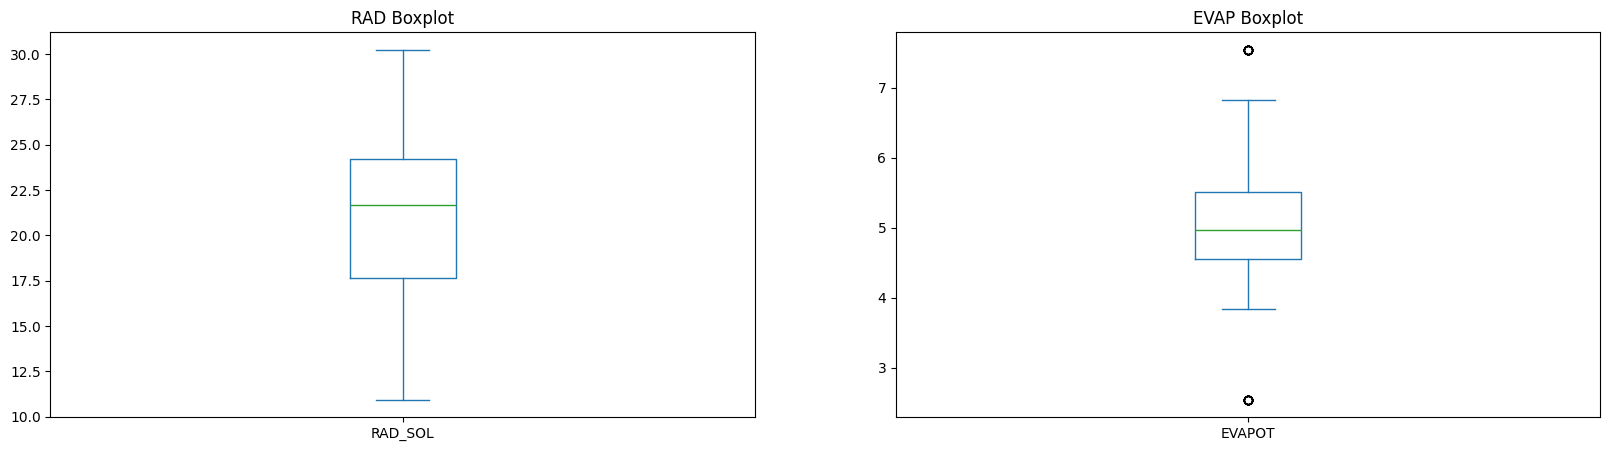

In [30]:
# boxplot
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
df['RAD_SOL'].plot(kind='box', title='RAD Boxplot', ax=axs[0])
df['EVAPOT'].plot(kind='box', title='EVAP Boxplot', ax=axs[1])
plt.show()

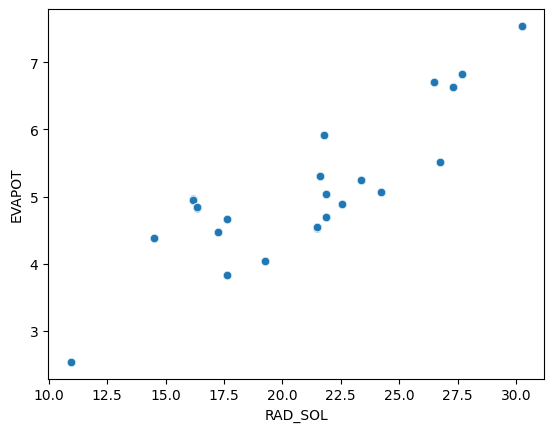

In [31]:
sns.scatterplot(x=df['RAD_SOL'], y=df['EVAPOT'], alpha=0.8)
# sns.lineplot(x=df['RAD_SOL'], y=df['EVAPOT'], color='purple', alpha=0.5) # line with error bar
plt.show()

There is a direct relation between EVAPOT and RAD_SOL

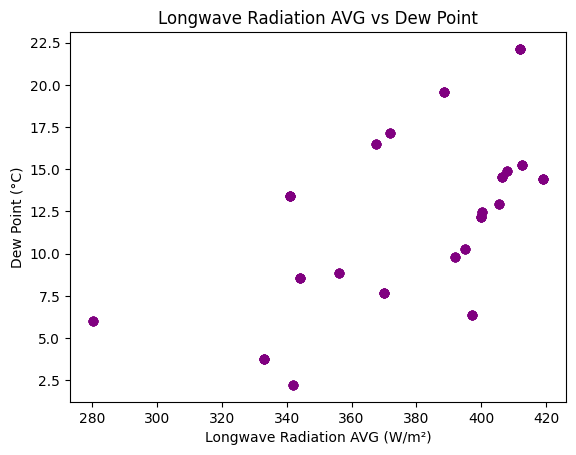

In [32]:
plt.scatter(df['Longwave_Rad_AVG'], df['Dew_Point'], alpha=0.5, color='purple')
plt.title('Longwave Radiation AVG vs Dew Point')
plt.xlabel('Longwave Radiation AVG (W/m²)')
plt.ylabel('Dew Point (°C)')
plt.show()

The dew point is the temperature the air needs to be cooled to (at constant pressure) in order to achieve a relative humidity (RH) of 100%. At this point the air cannot hold more water in the gas form.

Longwave radiation refers to energy emitted by Earth's surface, atmosphere, and clouds, primarily as infrared radiation.

There is a linear relation ship between Longwave Radiation AVG and Dew Point

the linear relationship confirms that humidity amplifies the greenhouse effect, where more water vapor leads to greater absorption and re-emission of infrared radiation in the atmosphere.

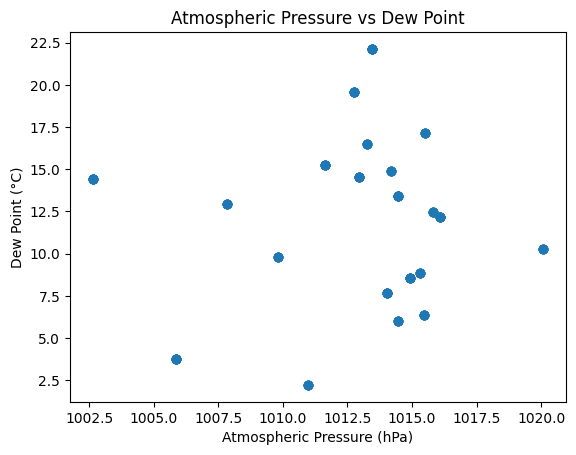

In [33]:
plt.scatter(df['PRES_ATM'], df['Dew_Point'], alpha=0.5)
plt.title('Atmospheric Pressure vs Dew Point')
plt.xlabel('Atmospheric Pressure (hPa)')
plt.ylabel('Dew Point (°C)')
plt.show()

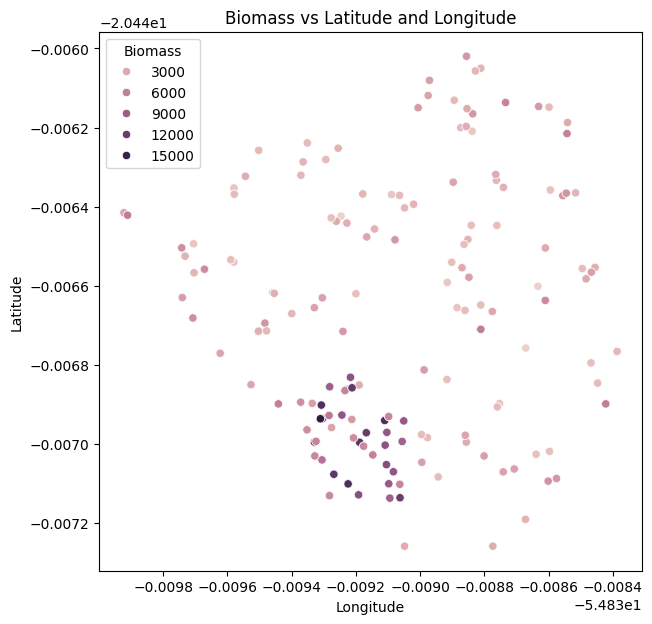

In [34]:
plt.figure(figsize=(7, 7))
sns.scatterplot(y=df['Lat'], x=df['Long_'], hue=df['Biomass'])
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('Biomass vs Latitude and Longitude')
plt.show()

In [35]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [36]:
import plotly.express as px

color_scale = [(0, 'green'), (1, 'white')]  # color scale for TEMP_MIN and TEMP_MAX

fig = px.scatter_mapbox(df, 
                        lat="Lat", 
                        lon="Long_", 
                        hover_name="Biomass", 
                        hover_data=["Sample_type", "Sample","Animals", "NDF", "DM", "Rainfall", "DOY", "Environmental Suitability Index"],
                        color="Animals", # this is the color that represents the side bar scale
                        color_continuous_scale=color_scale,
                        zoom=17.5,
                        size="Biomass",
                        height=600,
                        width=1000)

map_title = "Biomass Distribution with Satellite Image Overlay (White=Animals, Green=No Animals, Size=Biomass)"

# Add an image overlay
fig.update_layout(
    mapbox_style="open-street-map",
    mapbox=dict(
        layers=[{
            'below': 'traces',  # Layer the image below the data points
            'sourcetype': 'image',
            'source': 'sat-img.png',  # Provide the path to your image
            'coordinates': [
                [-54.84005, -20.44589],  # Top-left corner [lon, lat]
                [-54.83808, -20.44589],  # Top-right corner [lon, lat]
                [-54.83808, -20.44759],  # Bottom-right corner [lon, lat]
                [-54.84005, -20.44759]   # Bottom-left corner [lon, lat]
            ],
            'opacity': 1
        }]
    ),
    title=map_title,  # Add a title
    margin={"r":0,"t":50,"l":0,"b":0}  # Adjust margins to accommodate the title
)

fig.show()
#### IT TOOK 3 HOURS TO GET THE CORNERS OF THE IMAGE RIGHT!!!!
#### THE IMAGE IS A GOOGLE EARTH IMAGE OF THE AREA

#### use the zoom buttons to zoom in and out (top right) ####
####       hold left click and drag to move the map      ####

In [37]:
pd.crosstab(df['Sample_type'], df['TEMP_MAX'])

TEMP_MAX,26.6,27.0,27.8,28.8,29.8,29.9,30.4,30.6,30.7,31.0,31.3,31.7,31.8,31.9,32.0,32.3,32.8,33.5,33.9,35.1
Sample_type,,,,,,,,,,,,,,,,,,,,
G1,0,0,0,2,0,0,2,2,0,2,2,2,4,0,0,0,2,0,2,0
G2,0,0,0,2,0,0,2,2,2,2,0,0,4,0,0,0,2,0,2,0
G3,0,0,0,0,0,0,0,0,2,2,0,2,2,0,0,0,2,0,2,0
G4,0,0,0,0,0,0,0,0,0,2,2,2,4,0,0,0,2,0,0,0
Q1,2,2,2,2,2,2,2,2,2,2,2,2,4,2,2,2,2,2,2,2
Q2,2,2,2,2,2,2,2,2,2,2,0,2,4,2,2,2,2,2,2,2
Q3,2,2,2,2,2,2,2,2,2,2,2,2,4,2,2,2,2,2,2,2
Q4,2,2,2,2,2,2,2,2,2,2,2,2,4,2,2,2,2,2,2,2
S1,2,2,2,2,2,2,2,2,2,2,2,2,4,2,2,2,2,2,2,2


We can see that there is a higher biomass in the shown area in the green, this might be due to the fact that no animals are allowed in that area.

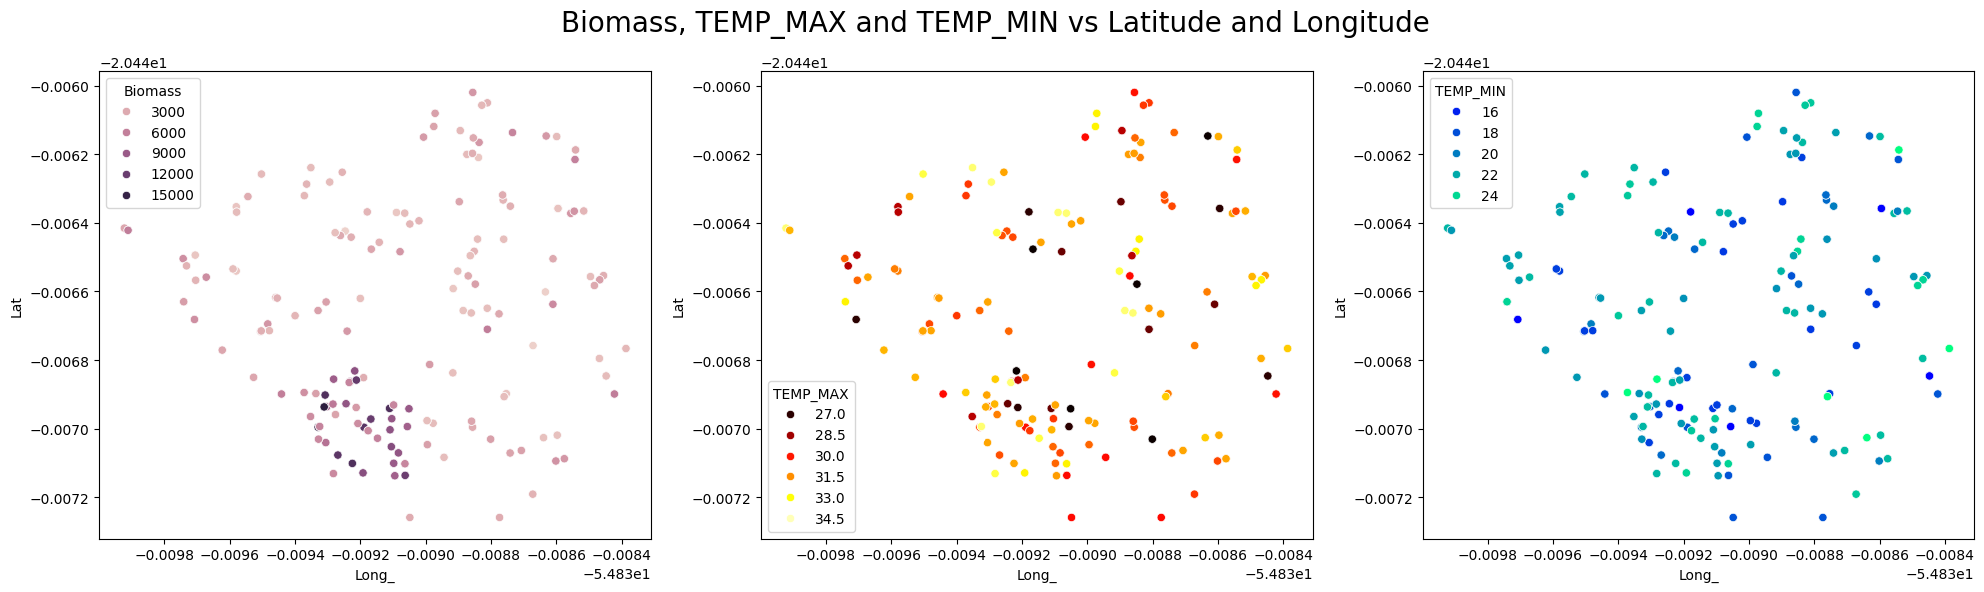

In [38]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

sns.scatterplot(x=df['Long_'], y=df['Lat'], hue=df['Biomass'], ax=ax[0])
sns.scatterplot(x=df['Long_'], y=df['Lat'], hue=df['TEMP_MAX'], palette='hot', ax=ax[1])
sns.scatterplot(x=df['Long_'], y=df['Lat'], hue=df['TEMP_MIN'], palette='winter', ax=ax[2])

fig.suptitle('Biomass, TEMP_MAX and TEMP_MIN vs Latitude and Longitude', fontsize=20)
plt.tight_layout()
plt.show()

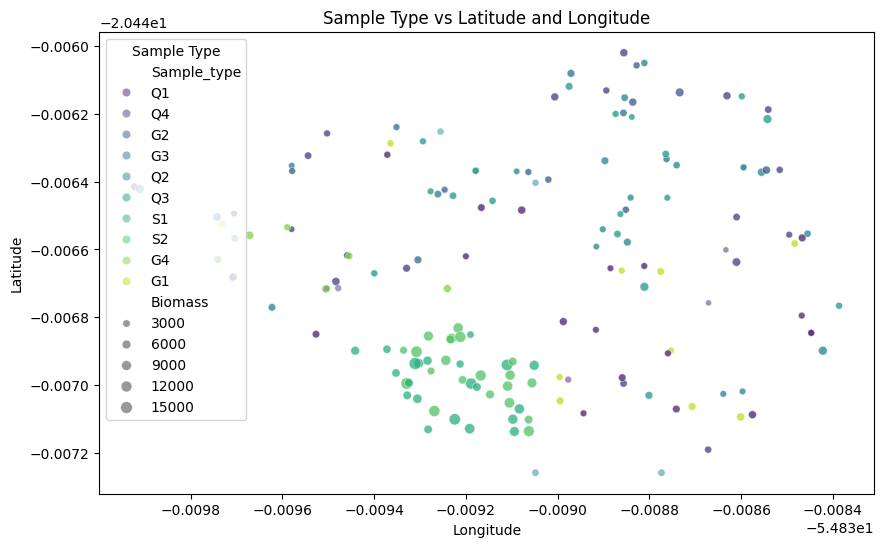

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Long_'], y=df['Lat'], hue=df['Sample_type'], palette='viridis', size=df['Biomass'], alpha=0.5)
plt.title('Sample Type vs Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Sample Type')
plt.show()

High Biomass values fro S1 and S2 type samples

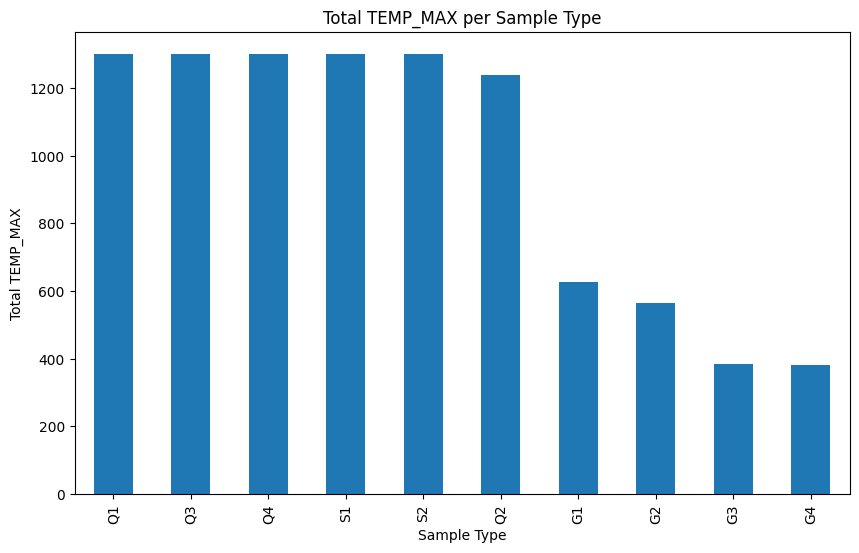

In [40]:
samples_temp_max = df.groupby('Sample_type')['TEMP_MAX'].sum().sort_values(ascending=False)
samples_temp_max.plot(kind='bar', figsize=(10, 6))
plt.title('Total TEMP_MAX per Sample Type')
plt.ylabel('Total TEMP_MAX')
plt.xlabel('Sample Type')
plt.show()

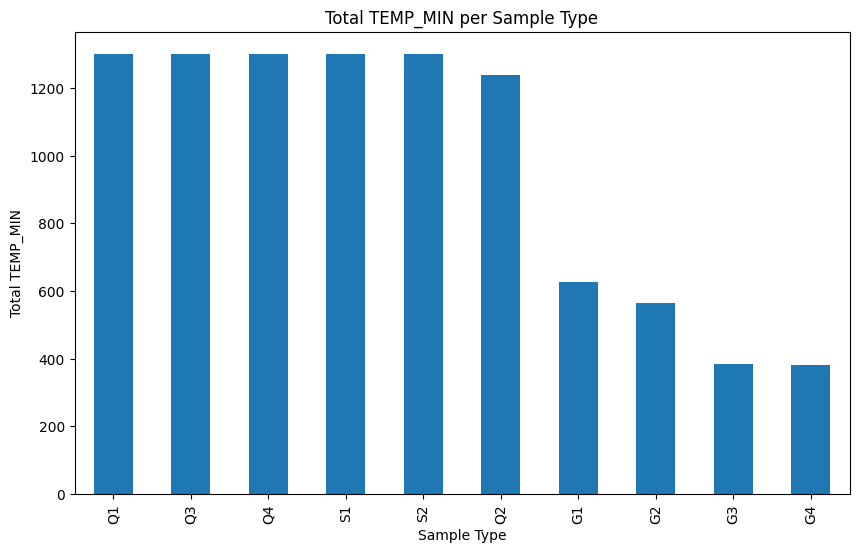

In [41]:
samples_temp_min = df.groupby('Sample_type')['TEMP_MIN'].sum().sort_values(ascending=False)
samples_temp_max.plot(kind='bar', figsize=(10, 6))
plt.title('Total TEMP_MIN per Sample Type')
plt.ylabel('Total TEMP_MIN')
plt.xlabel('Sample Type')
plt.show()

S1, S2, Q1, Q3, Q4 type samples showed the highest summed temperatures.

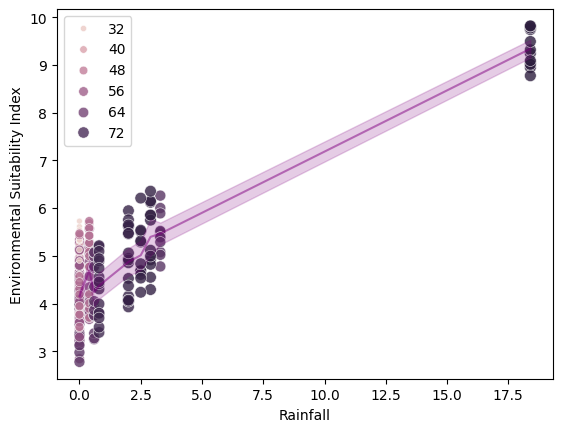

In [42]:
sns.scatterplot(y=df['Environmental Suitability Index'], x=df['Rainfall'], size=df['HUM_REL'], hue=df['HUM_REL'], alpha=0.8)
sns.lineplot(x=df['Rainfall'], y=df['Environmental Suitability Index'], color='purple', alpha=0.5) # line with error bar
plt.show()

There is a clear positive relationship between rainfall and the Environmental Suitability Index, indicating that higher rainfall contributes to a more stable environment capable of sustaining animals.

### Outlier Detection

In [43]:
df_copy = df.copy()
columns = df_copy.select_dtypes(include=[np.number]).columns
# performing outlier detection using the interquartile method
def detect_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return series[(series < lower_bound) | (series > upper_bound)].index

outliers_list = {col: detect_outliers(df_copy[col]) for col in columns}
outliers_df = pd.DataFrame(list(outliers_list.items()), columns=['Column', 'Outliers'])

outliers_df['outliers_count'] = outliers_df['Outliers'].apply(len)
outliers_df

,Column,Outliers,outliers_count
0,DOY,"Index([], dtype='int64')",0
1,Sample,"Index([], dtype='int64')",0
2,Sub-Sample,"Index([], dtype='int64')",0
3,Lat,"Index([], dtype='int64')",0
4,Long_,"Index([], dtype='int64')",0
5,Animals,"Index([], dtype='int64')",0
6,DM,"Index([], dtype='int64')",0
7,MM,"Index([], dtype='int64')",0
8,Biomass,"Index([ 14, 15, 26, 27, 44, 45, 46, 47,...",24
9,NDF,"Index([232, 233, 234, 235, 236, 237, 238, 239,...",19


# Insights

### Relationships Between Features

#### Contingency Table

In [44]:
pd.crosstab(df['Sample_type'], df['Animals'], margins=True, margins_name="Total")

Animals,0,1,Total
Sample_type,,,
G1,0,20,20
G2,0,18,18
G3,0,12,12
G4,0,12,12
Q1,0,42,42
Q2,0,40,40
Q3,0,42,42
Q4,0,42,42
S1,42,0,42


So, only S-type samples did not have animals in their sampling. Additionaly areas with no animals showed the highest Biomass counts.

#### Visualizations

In [45]:
# dropping categorical columns
df_numeric = df.select_dtypes(include=[np.number]).drop(['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12'], axis=1)
px.imshow(df_numeric.corr(), title='Correlation Heatmap',width=1000, height=1000)

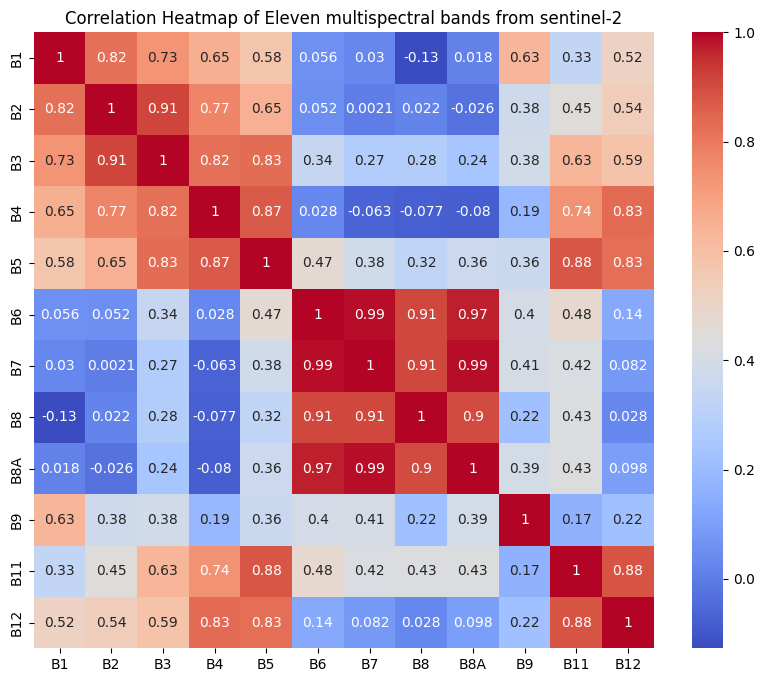

In [46]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12']].corr(), 
            annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Eleven multispectral bands from sentinel-2')
plt.show()

#### Interpreting the Statistical and Visual Analyses

# Perspective Analytics